In [1]:
# HOUSE PRICE PREDICTION USING LINEAR REGRESSION

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
#DATA COLLECTION
df=pd.read_csv("C:/Users/hp/Downloads/Housing.csv")
df.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
# DATA EXPLORATION & CLEANING

print(df.info())

print("\n--- Missing Values ---")
print(df.isnull().sum())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None

--- Missing Values ---
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad       

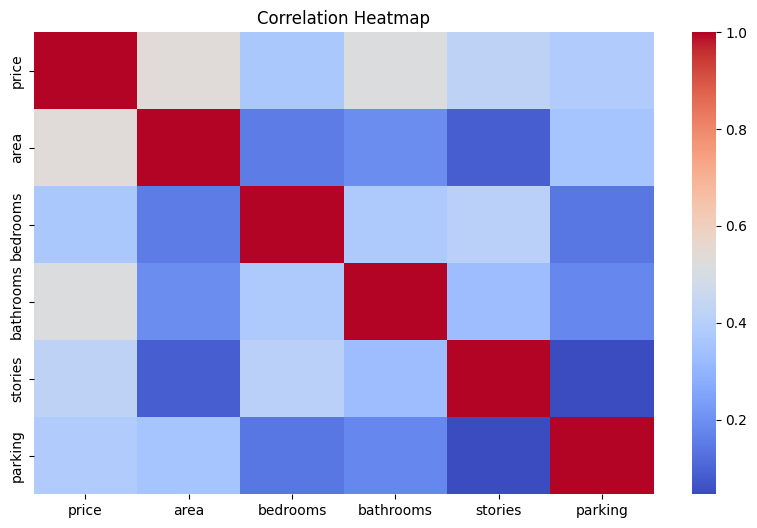

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'parking'], dtype='object')


In [5]:
# FEATURE SELECTION

df_numeric = df.select_dtypes(include=['int64', 'float64'])

# Correlation matrix
plt.figure(figsize=(10,6))
sns.heatmap(df_numeric.corr(), annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Set target variable (Y)
target = "price"  
Y = df[target]

# Select all other numerical columns as features (X)
X = df_numeric.drop(columns=[target])

print(X.columns)


In [6]:
# MODEL TRAINING (LINEAR REGRESSION)

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [7]:
# MODEL EVALUATION
Y_pred = model.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, Y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-Squared:", r2)

Mean Squared Error (MSE): 2292721545725.3613
Root Mean Squared Error (RMSE): 1514173.552049223
R-Squared: 0.5464062355495873


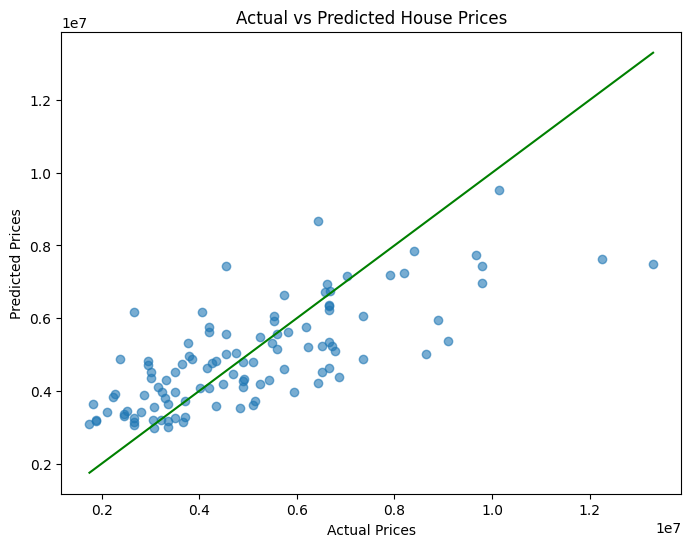

In [8]:
# VISUALIZATION: ACTUAL VS PREDICTED

plt.figure(figsize=(8,6))
plt.scatter(Y_test, Y_pred, alpha=0.6)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='green')
plt.show()